In [1]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/Sam/DESI/')

In [3]:
from   astropy.table import Table
from   cosmo import cosmo, fsky
from gama_limits import gama_field
from jackknife_limits import jk_field
import pubplot

In [4]:
dat = Table.read(os.environ['CSCRATCH'] + '/norberg/GAMA4/gama_gold_ddp_n8.fits')

In [5]:
isin = gama_field(dat['RA'], dat['DEC']) == 'G9'
G9 = dat[isin]

isin = gama_field(dat['RA'], dat['DEC']) == 'G12'
G12 = dat[isin]

isin = gama_field(dat['RA'], dat['DEC']) == 'G15'
G15 = dat[isin]

In [6]:
jk_field(G9['RA'], G9['DEC'])

array(['JK1', 'JK0', 'JK0', ..., 'JK2', 'JK0', 'JK2'], dtype='<U4')

In [7]:
jk_field(G12['RA'], G12['DEC'])

array(['JK4', 'JK5', 'JK5', ..., 'JK3', 'JK5', 'JK4'], dtype='<U4')

In [8]:
jk_field(G15['RA'], G15['DEC'])

array(['JK7', 'JK7', 'JK6', ..., 'JK6', 'JK6', 'JK6'], dtype='<U4')

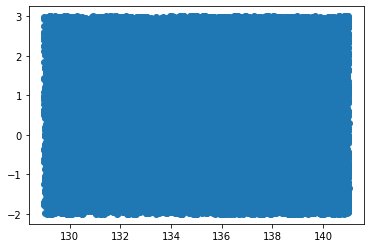

In [9]:
plt.scatter(G9['RA'], G9['DEC'])

In [10]:
isin = jk_field(dat['RA'], dat['DEC']) == 'JK0'
JK0 = dat[isin]

isin = jk_field(dat['RA'], dat['DEC']) == 'JK1'
JK1 = dat[isin]

isin = jk_field(dat['RA'], dat['DEC']) == 'JK2'
JK2 = dat[isin]

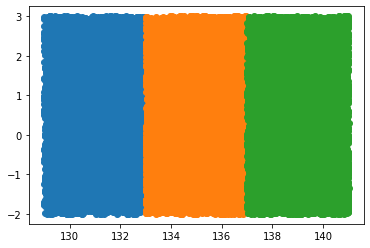

In [11]:
plt.scatter(JK0['RA'], JK0['DEC'])
plt.scatter(JK1['RA'], JK1['DEC'])
plt.scatter(JK2['RA'], JK2['DEC'])